<a href="https://colab.research.google.com/github/JennEYoon/deep-learning/blob/main/chollet2/chollet_chp10_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook was generated for TensorFlow 2.6.

Jennifer Yoon, run on Colab and local wsl2.  
Feb 2022

# Deep learning for timeseries

## Different kinds of timeseries tasks

## A temperature-forecasting example

In [1]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2022-02-13 22:00:06--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.65.38
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.65.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  36.5MB/s    in 0.4s    

2022-02-13 22:00:07 (36.5 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


**Inspecting the data of the Jena weather dataset**

In [3]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))
# 420,450 data rows, 1 header row 
# first row 1/1/2009.  
# last row 1/1/2017. 
# date, month, year, time hh:mm:ss format.

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [4]:
# data inspection with pandas  
import pandas as pd  
print(pd.__version__)
!python --version

1.3.5
Python 3.7.12


In [7]:
jena = pd.read_csv(fname)
print(jena.head())
print(jena.tail())
print(len(jena))

             Date Time  p (mbar)  T (degC)  ...  wv (m/s)  max. wv (m/s)  wd (deg)
0  01.01.2009 00:10:00    996.52     -8.02  ...      1.03           1.75     152.3
1  01.01.2009 00:20:00    996.57     -8.41  ...      0.72           1.50     136.1
2  01.01.2009 00:30:00    996.53     -8.51  ...      0.19           0.63     171.6
3  01.01.2009 00:40:00    996.51     -8.31  ...      0.34           0.50     198.0
4  01.01.2009 00:50:00    996.51     -8.27  ...      0.32           0.63     214.3

[5 rows x 15 columns]
                  Date Time  p (mbar)  ...  max. wv (m/s)  wd (deg)
420446  31.12.2016 23:20:00   1000.07  ...           1.52     240.0
420447  31.12.2016 23:30:00    999.93  ...           1.92     234.3
420448  31.12.2016 23:40:00    999.82  ...           2.00     215.2
420449  31.12.2016 23:50:00    999.81  ...           2.16     225.8
420450  01.01.2017 00:00:00    999.82  ...           1.96     184.9

[5 rows x 15 columns]
420451


In [11]:
jena.iloc[420450, 0]

'01.01.2017 00:00:00'

In [12]:
jena.iloc[420450, :]

Date Time          01.01.2017 00:00:00
p (mbar)                        999.82
T (degC)                         -4.82
Tpot (K)                        268.36
Tdew (degC)                      -8.42
rh (%)                            75.7
VPmax (mbar)                      4.27
VPact (mbar)                      3.23
VPdef (mbar)                      1.04
sh (g/kg)                         2.01
H2OC (mmol/mol)                   3.23
rho (g/m**3)                   1296.38
wv (m/s)                          1.23
max. wv (m/s)                     1.96
wd (deg)                         184.9
Name: 420450, dtype: object

In [13]:
jena.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000
mean,989.212508,9.448567,283.491182,4.954011,76.007045,13.575089,9.532524,4.042483,6.021630,9.638982,1216.069883,2.130309,3.532381,174.726164
std,8.359454,8.423685,8.504820,6.730411,16.477126,7.739481,4.183895,4.897270,2.655973,4.235130,39.977065,1.541830,2.340482,86.675965
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,0.000000,0.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.800000
50%,989.570000,9.410000,283.460000,5.210000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.800000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.480000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,14.630000,23.500000,360.000000


In [15]:
jena.corr()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
p (mbar),1.000000,-0.045402,-0.124751,-0.066803,-0.018368,-0.031565,-0.054420,-0.003395,-0.069815,-0.069857,0.307686,-0.209693,-0.204802,-0.063296
T (degC),-0.045402,1.000000,0.996826,0.895707,-0.572519,0.951109,0.867671,0.761813,0.866752,0.867174,-0.963404,0.088449,0.125173,0.038562
Tpot (K),-0.124751,0.996826,1.000000,0.894912,-0.567226,0.947289,0.866205,0.757028,0.866533,0.866955,-0.981342,0.104709,0.140781,0.043434
Tdew (degC),-0.066803,0.895707,0.894912,1.000000,-0.156738,0.799273,0.968334,0.435854,0.967589,0.968034,-0.885231,-0.053629,-0.036074,0.049665
rh (%),-0.018368,-0.572519,-0.567226,-0.156738,1.000000,-0.615915,-0.151627,-0.843829,-0.150974,-0.151102,0.514373,-0.312276,-0.362902,-0.015919
VPmax (mbar),-0.031565,0.951109,0.947289,0.799273,-0.615915,1.000000,0.824881,0.875639,0.824475,0.824508,-0.901526,0.092518,0.126458,-0.009740
VPact (mbar),-0.054420,0.867671,0.866205,0.968334,-0.151627,0.824881,1.000000,0.449274,0.999851,0.999856,-0.850238,-0.068845,-0.055761,0.018180
VPdef (mbar),-0.003395,0.761813,0.757028,0.435854,-0.843829,0.875639,0.449274,1.000000,0.448759,0.448807,-0.698348,0.205032,0.247491,-0.030922
sh (g/kg),-0.069815,0.866752,0.866533,0.967589,-0.150974,0.824475,0.999851,0.448759,1.000000,0.999997,-0.853322,-0.065340,-0.052414,0.019139
H2OC (mmol/mol),-0.069857,0.867174,0.866955,0.968034,-0.151102,0.824508,0.999856,0.448807,0.999997,1.000000,-0.853767,-0.065264,-0.052304,0.019370


In [18]:
df = jena.iloc[:, [2, 4, 5, 7]]
df.head()

,T (degC),Tdew (degC),rh (%),VPact (mbar)
0,-8.02,-8.90,93.3,3.11
1,-8.41,-9.28,93.4,3.02
2,-8.51,-9.31,93.9,3.01
3,-8.31,-9.07,94.2,3.07
4,-8.27,-9.04,94.1,3.08


In [19]:
df2 = (df-df.mean())/df.std()
df2.head()
# guassian normalized, mean 0, std 1.  

,T (degC),Tdew (degC),rh (%),VPact (mbar)
0,-2.073744,-2.058420,1.049513,-1.535058
1,-2.120042,-2.114880,1.055582,-1.556569
2,-2.131913,-2.119337,1.085927,-1.558960
3,-2.108171,-2.083678,1.104134,-1.544619
4,-2.103422,-2.079221,1.098065,-1.542229


In [20]:
df3 = (df-df.min())/(df.max()-df.min())
df3.head()
# normalized to uniform distribution, range 0 to 1.  

,T (degC),Tdew (degC),rh (%),VPact (mbar)
0,0.248632,0.334788,0.923033,0.084272
1,0.242163,0.326891,0.924182,0.081003
2,0.240504,0.326268,0.929925,0.080639
3,0.243822,0.331255,0.933372,0.082819
4,0.244485,0.331879,0.932223,0.083182


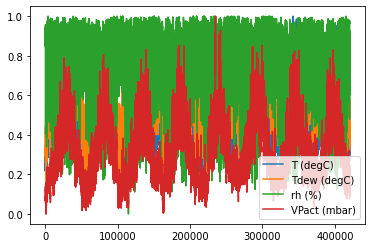

In [28]:
# plot some relationships.  Temperature seems related to 
# rh, relative humidity, and VPact, pressure actual?  
import matplotlib.pyplot as plt

df3.plot()

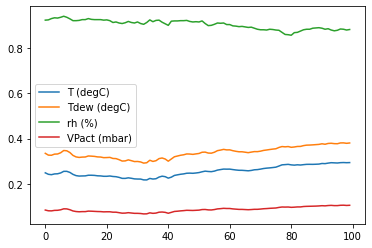

In [27]:
df4 = df3.iloc[0:100]
df4
df4.plot()

**Parsing the data**

In [ ]:
import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:]

In [ ]:
print(raw_data[0])

[ 9.96520e+02 -8.02000e+00  2.65400e+02 -8.90000e+00  9.33000e+01
  3.33000e+00  3.11000e+00  2.20000e-01  1.94000e+00  3.12000e+00
  1.30775e+03  1.03000e+00  1.75000e+00  1.52300e+02]


**Plotting the temperature timeseries**

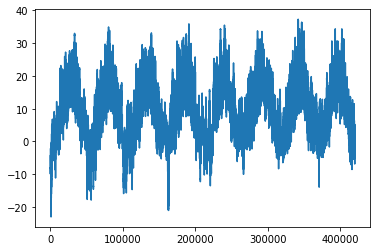

In [ ]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)

**Plotting the first 10 days of the temperature timeseries**

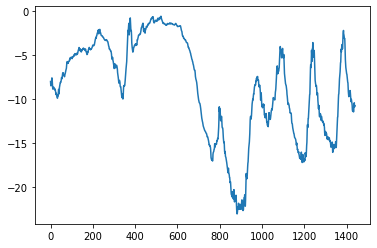

In [ ]:
plt.plot(range(1440), temperature[:1440])

**Computing the number of samples we'll use for each data split**

In [ ]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114


### Preparing the data

**Normalizing the data**

In [ ]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

In [ ]:
import numpy as np
from tensorflow import keras
int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2,
)

for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


**Instantiating datasets for training, validation, and testing**

In [ ]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

**Inspecting the output of one of our datasets**

In [ ]:
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break

samples shape: (256, 120, 14)
targets shape: (256,)


### A common-sense, non-machine-learning baseline

**Computing the common-sense baseline MAE**

In [ ]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 2.44
Test MAE: 2.62


### Let's try a basic machine-learning model

**Training and evaluating a densely connected model**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_dense.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 41s 48ms/step - loss: 12.2833 - mae: 2.7212 - val_loss: 11.6259 - val_mae: 2.6992
Epoch 2/10
819/819 [==============================] - 42s 51ms/step - loss: 9.1401 - mae: 2.3734 - val_loss: 11.2358 - val_mae: 2.6536
Epoch 3/10
819/819 [==============================] - 40s 48ms/step - loss: 8.3581 - mae: 2.2720 - val_loss: 11.0665 - val_mae: 2.6238
Epoch 4/10
819/819 [==============================] - 40s 48ms/step - loss: 7.8731 - mae: 2.2055 - val_loss: 10.9442 - val_mae: 2.6081
Epoch 5/10
819/819 [==============================] - 40s 48ms/step - loss: 7.5150 - mae: 2.1577 - val_loss: 13.5004 - val_mae: 2.9345
Epoch 6/10
819/819 [==============================] - 40s 48ms/step - loss: 7.2529 - mae: 2.1207 - val_loss: 11.3990 - val_mae: 2.6574
Epoch 7/10
819/819 [==============================] - 39s 48ms/step - loss: 7.0605 - mae: 2.0921 - val_loss: 13.6571 - val_mae: 2.9037
Epoch 8/10
819/819 [==============================] - 

**Plotting results**

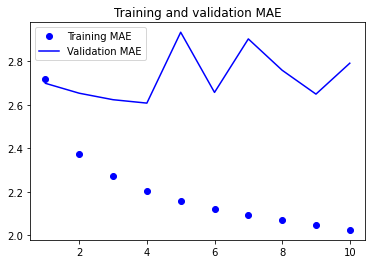

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

### Let's try a 1D convolutional model

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_conv.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_conv.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 50s 51ms/step - loss: 23.1273 - mae: 3.7091 - val_loss: 18.1833 - val_mae: 3.4032
Epoch 2/10
819/819 [==============================] - 42s 51ms/step - loss: 15.2723 - mae: 3.0975 - val_loss: 16.4407 - val_mae: 3.1559
Epoch 3/10
819/819 [==============================] - 42s 51ms/step - loss: 14.1100 - mae: 2.9755 - val_loss: 13.9052 - val_mae: 2.9538
Epoch 4/10
819/819 [==============================] - 42s 51ms/step - loss: 13.2307 - mae: 2.8772 - val_loss: 14.2448 - val_mae: 3.0004
Epoch 5/10
819/819 [==============================] - 42s 51ms/step - loss: 12.5884 - mae: 2.8018 - val_loss: 14.5509 - val_mae: 2.9916
Epoch 6/10
819/819 [==============================] - 42s 51ms/step - loss: 12.0534 - mae: 2.7430 - val_loss: 14.2911 - val_mae: 2.9857
Epoch 7/10
819/819 [==============================] - 42s 51ms/step - loss: 11.5949 - mae: 2.6903 - val_loss: 14.8805 - val_mae: 3.0525


### A first recurrent baseline

**A simple LSTM-based model**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

## Understanding recurrent neural networks

**NumPy implementation of a simple RNN**

In [ ]:
import numpy as np
timesteps = 100
input_features = 32
output_features = 64
inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.stack(successive_outputs, axis=0)

### A recurrent layer in Keras

**An RNN layer that can process sequences of any length**

In [ ]:
num_features = 14
inputs = keras.Input(shape=(None, num_features))
outputs = layers.SimpleRNN(16)(inputs)

**An RNN layer that returns only its last output step**

In [ ]:
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=False)(inputs)
print(outputs.shape)

**An RNN layer that returns its full output sequence**

In [ ]:
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=True)(inputs)
print(outputs.shape)

**Stacking RNN layers**

In [ ]:
inputs = keras.Input(shape=(steps, num_features))
x = layers.SimpleRNN(16, return_sequences=True)(inputs)
x = layers.SimpleRNN(16, return_sequences=True)(x)
outputs = layers.SimpleRNN(16)(x)

## Advanced use of recurrent neural networks

### Using recurrent dropout to fight overfitting

**Training and evaluating a dropout-regularized LSTM**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=val_dataset,
                    callbacks=callbacks)

In [ ]:
inputs = keras.Input(shape=(sequence_length, num_features))
x = layers.LSTM(32, recurrent_dropout=0.2, unroll=True)(inputs)

### Stacking recurrent layers

**Training and evaluating a dropout-regularized, stacked GRU model**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_stacked_gru_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_stacked_gru_dropout.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

### Using bidirectional RNNs

**Training and evaluating a bidirectional LSTM**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset)

### Going even further

## Summary